# Part 1: Data analysis & classification for news articles

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
columns = ['label', 'title', 'news_content']
df = pd.read_csv('train.csv', header=None, names=columns, sep= ',')
df.head(20)

,label,title,news_content
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [43]:
def custom_logic(row):
    if row['label'] == 1:
        return 'World'
    elif row['label'] == 2:
        return 'Sports'
    elif row['label'] == 3:
        return 'Business'    
    else:
        return 'Sci/Tech'

# Apply the custom function
df['category'] = df.apply(custom_logic, axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   label         120000 non-null  int64 
 1   title         120000 non-null  object
 2   news_content  120000 non-null  object
 3   category      120000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [45]:
df.groupby(by='category').count()

,label,title,news_content
category,,,
Business,30000,30000,30000
Sci/Tech,30000,30000,30000
Sports,30000,30000,30000
World,30000,30000,30000


News acrticles are evenly distributed by category


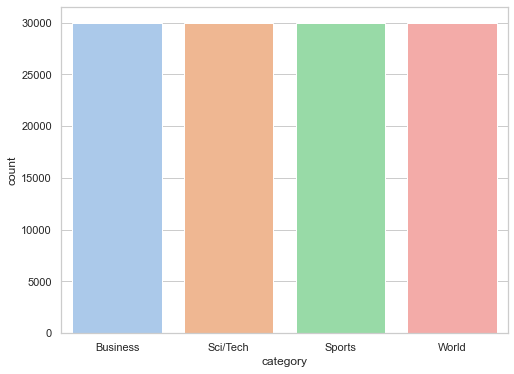

In [97]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'category', palette = 'pastel')
print('News acrticles are evenly distributed by category')

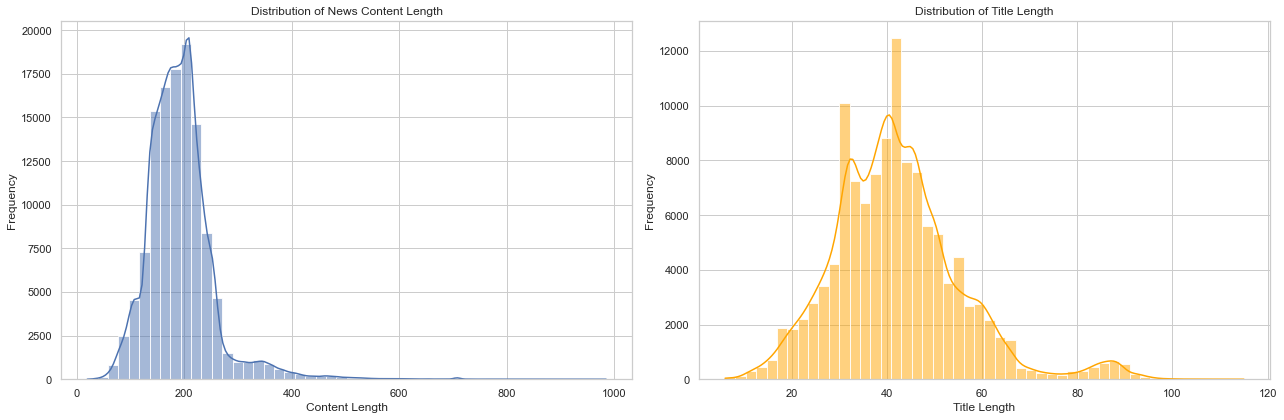

In [47]:

df['content_length'] = df['news_content'].apply(len)
df['title_length'] = df['title'].apply(len)


plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['content_length'], bins=50, kde=True)
plt.title('Distribution of News Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(df['title_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<b>News content lenght </b> 
The distribution appears to be roughly normal but is slightly right-skewed, meaning there are a few articles that are much longer than the average.
The peak of the distribution suggests that the most common article length is between 200 to 300 words/characters



<b>Title content lenght</b>
The distribution is strongly right-skewed, indicating that most article titles are short, with a small number of titles being much longer.
The peak of the distribution indicates that the most common title length is between 50 to 60 characters.


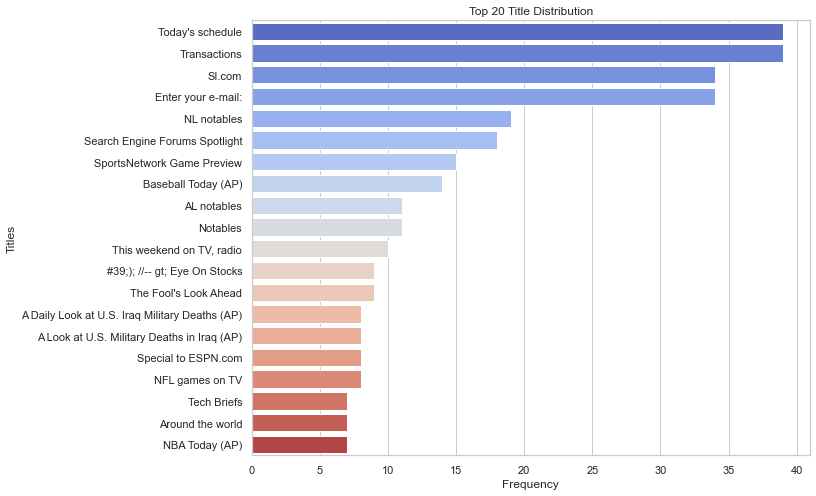

In [48]:

label_counts = df['title'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(y=label_counts.index, x=label_counts.values, palette="coolwarm")
plt.title('Top 20 Title Distribution')
plt.xlabel('Frequency')
plt.ylabel('Titles')
plt.show()


"Today's schedule" appears most frequently, with a count close to 40 occurrences. The frequencies then generally decrease for subsequent titles. Some titles like "SI.com," "Enter your e-mail:", and "NL notables" also appear with relative frequency, indicating they are common titles as well.

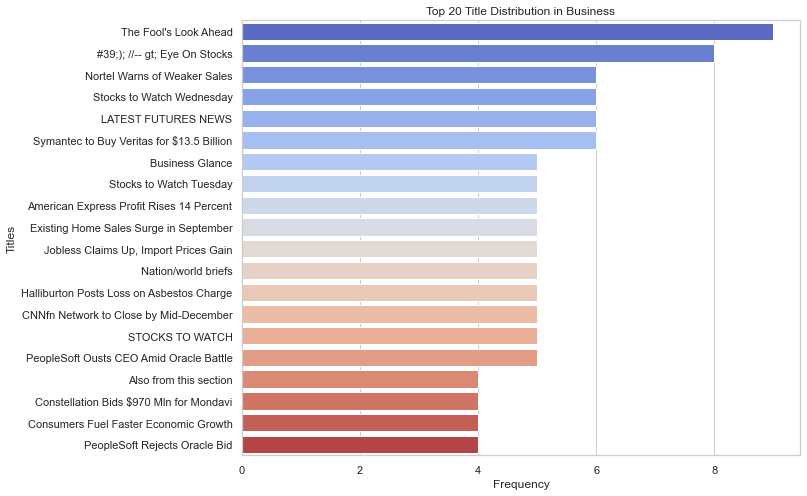

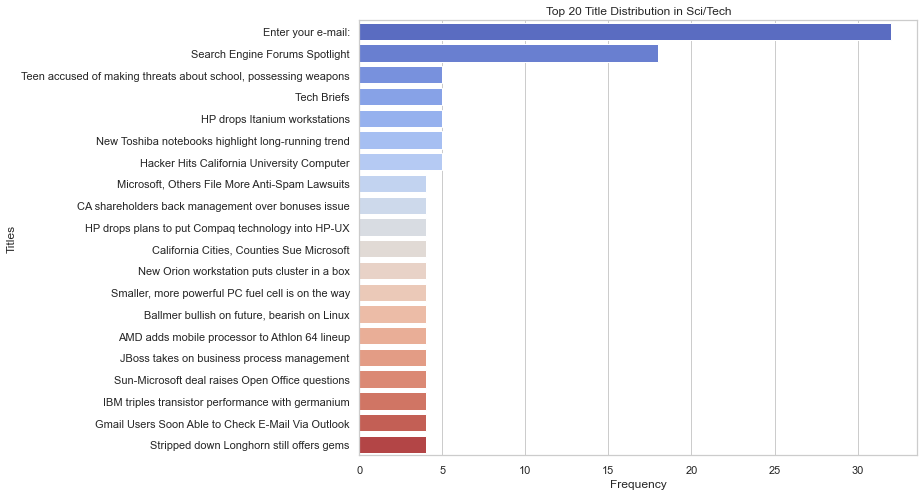

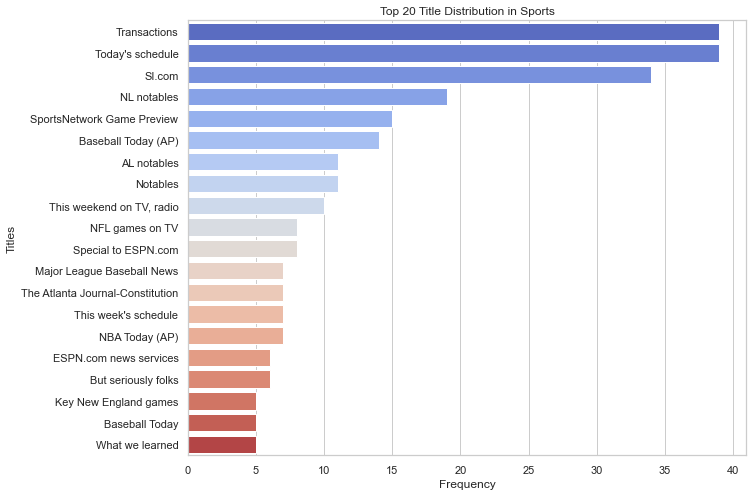

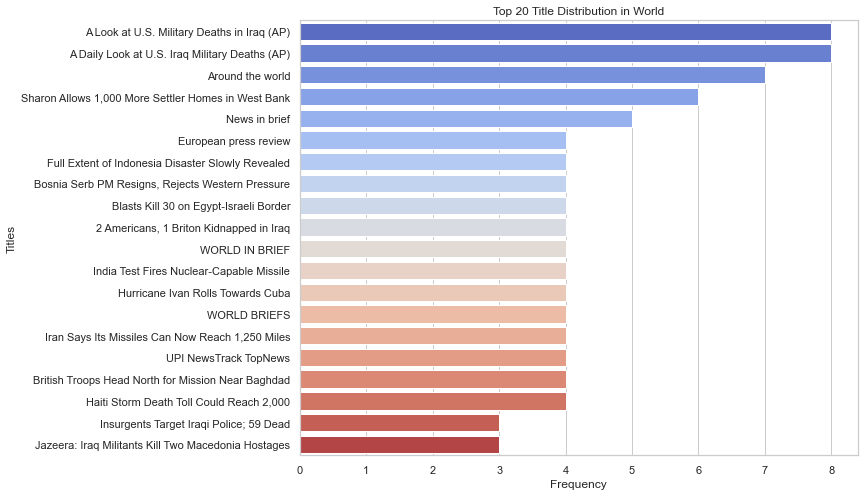

In [49]:
selected_categories = df['category'].unique()  # Adjust as needed, selecting first 5 for demonstration

# Plotting the top 20 titles within each of the selected categories
for category in selected_categories:
    # Filter the DataFrame for the current category
    df_filtered = df[df['category'] == category]
   # colors = ['Blues', 'YlOrBr', 'seagreen', 'rocket']
    # Calculate the top 20 title frequencies within this category
    label_counts = df_filtered['title'].value_counts().head(20)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    sns.barplot(y=label_counts.index, x=label_counts.values, palette='coolwarm')
    plt.title(f'Top 20 Title Distribution in {category}')
    plt.xlabel('Frequency')
    plt.ylabel('Titles')
    plt.show()

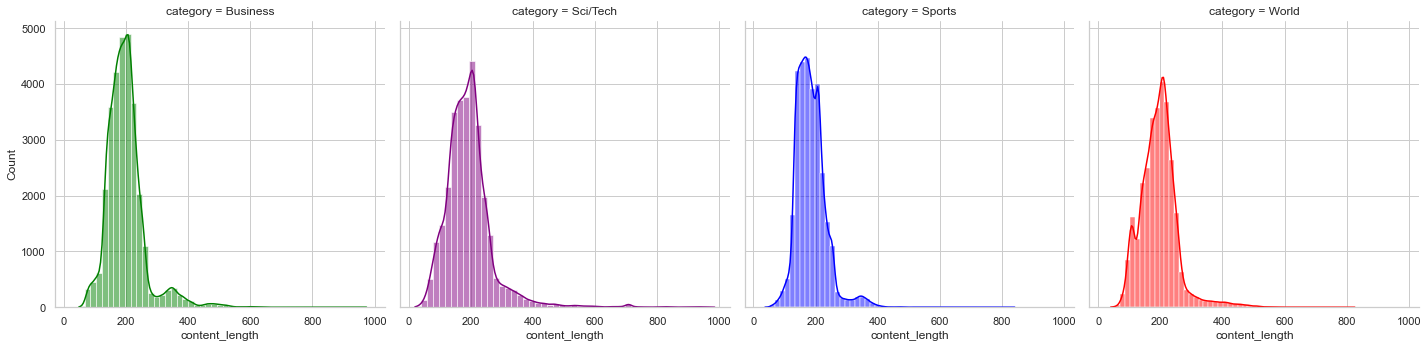

In [102]:
df['category'] = df['category'].astype('category')
df['hue'] = df['category']

palette = {'World': 'red', 'Sports': 'blue', 'Business': 'green', 'Sci/Tech': 'purple'}

g = sns.FacetGrid(df, col='category', hue='hue', palette=palette, height=5, aspect=1)
g.map(sns.histplot, 'content_length', bins=50, kde=True)

__Business (Green histogram):__
This histogram shows a peak at around the 200 to 300 content length range, suggesting that most business articles are of this length.
The distribution is roughly normal but shows a slight right-skew, indicating there are articles that are longer than the average.

__Sci/Tech (Purple histogram):__
The Sci/Tech category shows a similar distribution to Business with its peak also around the 200 to 300 range, but with a more pronounced right tail.
This could imply that while most articles are of average length, Sci/Tech articles tend to have more variation with a significant number extending to longer lengths.

__Sports (Blue histogram):__
The Sports category's content length distribution is again centered around the 200 to 300 range but with a narrower spread than the previous categories.
This suggests that sports articles tend to be more consistently within the average length range, with fewer long articles.

__World (Red histogram):__
The World news histogram is quite interesting with a very sharp peak at the 200 to 300 range and a long right tail.
This indicates that World news articles are most commonly around a standard length but there's a notable number of much longer articles, perhaps due to the detailed coverage of global events.

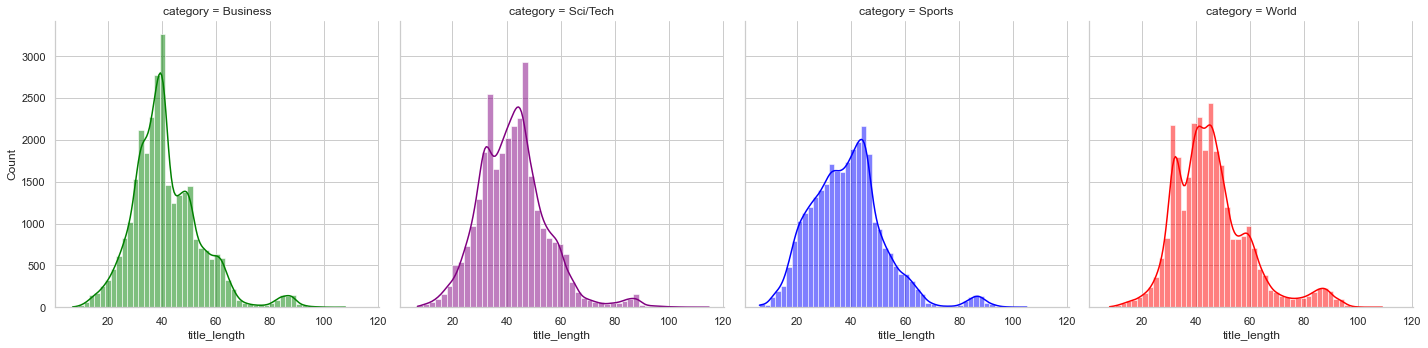

In [ ]:
df['category'] = df['category'].astype('category')
df['hue'] = df['category']

palette = {'World': 'red', 'Sports': 'blue', 'Business': 'green', 'Sci/Tech': 'purple'}

g = sns.FacetGrid(df, col='category', hue='hue', palette=palette, height=5, aspect=1)
g.map(sns.histplot, 'title_length', bins=50, kde=True)

__Business:__
This histogram indicates that the majority of Business article titles are between 10 and 20 characters long, with a significant drop as title length increases.
It is notably right-skewed, meaning there are a few business article titles that are much longer than average.

__Sci/Tech:__
The Sci/Tech histogram peaks slightly later than Business, suggesting that Sci/Tech article titles tend to be a bit longer, predominantly between 20 and 30 characters.
The distribution again shows a right-skewed pattern with a tail extending towards longer title lengths.

__Sports:__
Sports article titles have a distribution with a peak around 20 to 30 characters, similar to Sci/Tech.
This category's distribution is less skewed than the others, with a more symmetrical shape around the peak.

__World:__
The histogram for World news titles shows the highest peak among the four, indicating a very common title length of around 20 to 30 characters.
Like the others, it is right-skewed, but it also has a smaller secondary peak around 60 characters, which may suggest a secondary common length for World news titles.

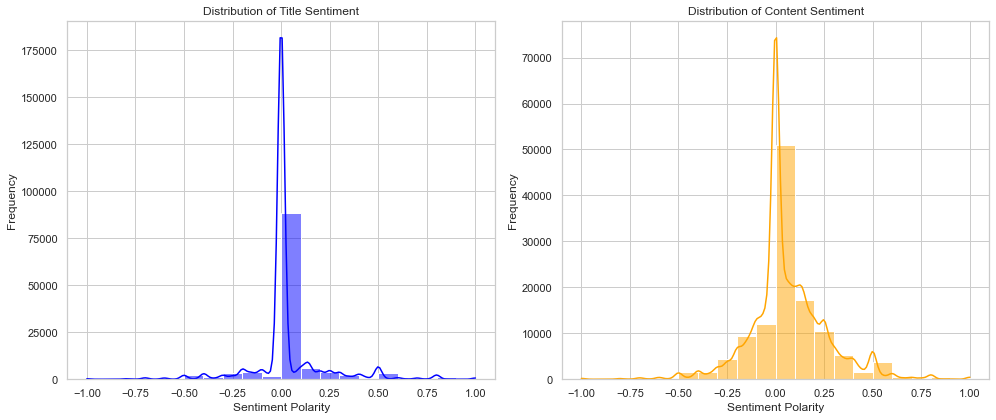

(count    120000.000000
 mean          0.026121
 std           0.186468
 min          -1.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           1.000000
 Name: title_sentiment, dtype: float64,
 count    120000.000000
 mean          0.061480
 std           0.198482
 min          -1.000000
 25%           0.000000
 50%           0.000000
 75%           0.150000
 max           1.000000
 Name: content_sentiment, dtype: float64)

In [ ]:
#!pip install textblob

from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Calculate sentiment for titles and contents
df['title_sentiment'] = df['title'].apply(lambda x: calculate_sentiment(x).polarity)
df['content_sentiment'] = df['news_content'].apply(lambda x: calculate_sentiment(x).polarity)

# Visualizing the sentiment distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['title_sentiment'], kde=True, bins=20, color='blue')
plt.title('Distribution of Title Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['content_sentiment'], kde=True, bins=20, color='orange')
plt.title('Distribution of Content Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics of sentiment
title_sentiment_summary = df['title_sentiment'].describe()
content_sentiment_summary = df['content_sentiment'].describe()

title_sentiment_summary, content_sentiment_summary


__Distribution of Title Sentiment (Blue Histogram):__
The histogram for title sentiment shows a very sharp peak around the 0 mark on the sentiment polarity scale.
This indicates that the titles of news articles are predominantly neutral in sentiment.
The lack of bars extending towards the -1 and 1 extremes suggests that very few titles have strongly negative or positive sentiments.

__Distribution of Content Sentiment (Orange Histogram):__
The histogram for content sentiment is also centered around the 0 mark but has a wider distribution than the title sentiment, suggesting a greater variance in the sentiment of news content.
There is a more noticeable presence of articles with slight positive or negative sentiment, as indicated by the wider spread of the distribution, though it still peaks at neutrality.
Similar to the title sentiment, there are relatively few articles with extremely positive or negative content.

In [51]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dinobenger/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dinobenger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

In [103]:

df['tokens'] = df['news_content'].apply(preprocess_text)

category_tokens = df.groupby('category')['tokens'].sum()


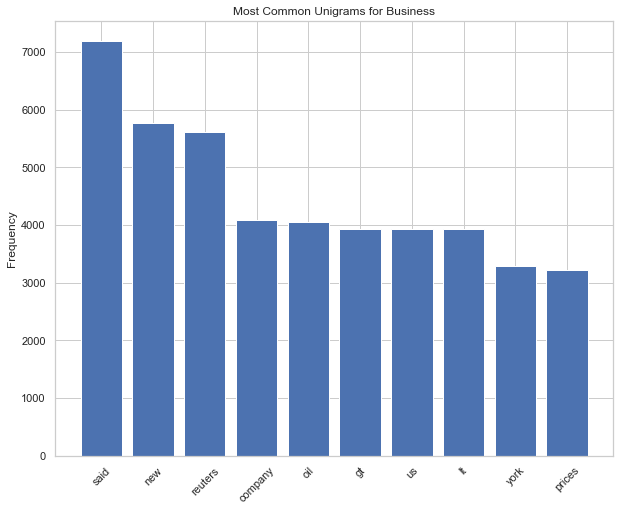

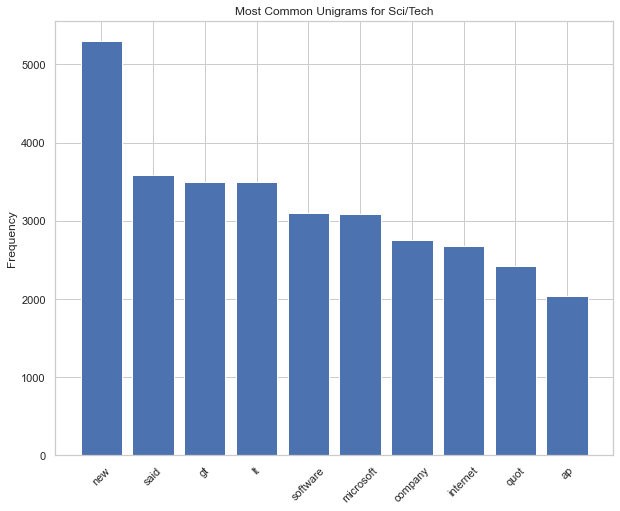

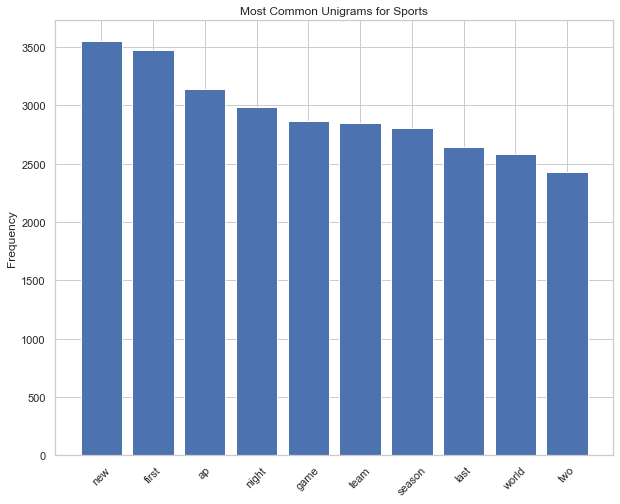

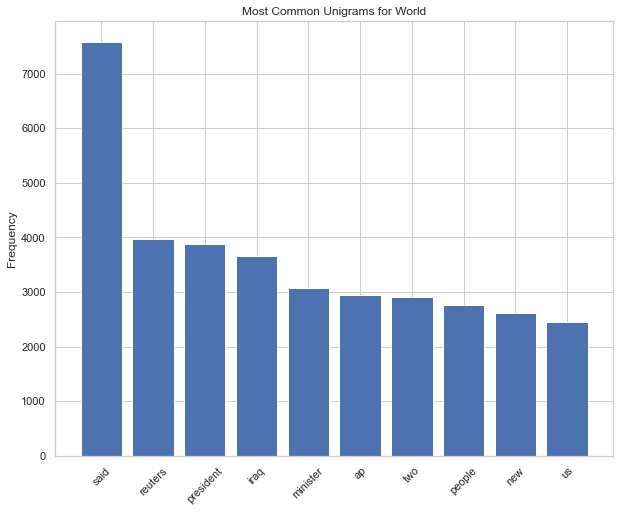

In [104]:
def plot_most_common_unigrams(tokens, category, num=10):

    freq_dist = nltk.FreqDist(tokens)
    common_tokens = freq_dist.most_common(num)
    tokens, counts = zip(*common_tokens)
    
    plt.figure(figsize=(10, 8))
    plt.bar(tokens, counts)
    plt.title(f'Most Common Unigrams for {category}')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

for category, tokens in category_tokens.items():
    plot_most_common_unigrams(tokens, category)


## Bonus (Optional but highly recommended)

In [75]:
columns = ['label', 'title', 'news_content']
training_data = pd.read_csv('train.csv', header=None, names=columns, sep= ',')
training_data.head(20)

,label,title,news_content
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre..."


In [56]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
#from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dinobenger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dinobenger/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dinobenger/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Preprocessing the data

In [76]:
training_data['text'] = training_data['title'] + ' ' + training_data['news_content']

def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
training_data['text'] = training_data['text'].apply(special_char)


def convert_lower(text):
    return text.lower()
training_data['text'] = training_data['text'].apply(convert_lower)
training_data['text'][1]



def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
training_data['text'] = training_data['text'].apply(remove_stopwords)
training_data['text'][1]


def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
training_data['text'] = training_data['text'].apply(lemmatize_word)
training_data['text'][1]

'carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group reputation making well timed occasionally controversial play defense industry quietly placed bet another part market'

In [77]:
training_data.head(20)

,label,title,news_content,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bear claw back black reuters reuters s...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle look toward commercial aerospace reute...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil economy cloud stock outlook reuters reuter...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipeline re...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar time record posing new menace u...
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,stock end near year low reuters reuters stock ...
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...,money fund fell latest week ap ap asset nation...
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...,fed minute show dissent inflation usatoday com...
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...,safety net forbes com forbes com earning ph so...
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre...",wall st bear claw back black new york reuters ...


### Test data

In [71]:
columns = ['label', 'title', 'news_content']
test_data = pd.read_csv('test.csv', header=None, names=columns, sep= ',')
test_data.head(20)

,label,title,news_content
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
5,4,Open Letter Against British Copyright Indoctri...,The British Department for Education and Skill...
6,4,Loosing the War on Terrorism,"\\""Sven Jaschan, self-confessed author of the ..."
7,4,"FOAFKey: FOAF, PGP, Key Distribution, and Bloo...",\\FOAF/LOAF and bloom filters have a lot of i...
8,4,E-mail scam targets police chief,"Wiltshire Police warns about ""phishing"" after ..."
9,4,"Card fraud unit nets 36,000 cards","In its first two years, the UK's dedicated car..."


In [73]:
test_data['text'] = test_data['title'] + ' ' + test_data['news_content']

def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
test_data['text'] = test_data['text'].apply(special_char)


def convert_lower(text):
    return text.lower()
test_data['text'] = test_data['text'].apply(convert_lower)
test_data['text'][1]



def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
test_data['text'] = test_data['text'].apply(remove_stopwords)
test_data['text'][1]


def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
test_data['text'] = test_data['text'].apply(lemmatize_word)
test_data['text'][1]

'race second private team set launch date human spaceflight space com space com toronto canada second team rocketeers competing 36 10 million ansari x prize contest privately funded suborbital space flight officially announced first launch date manned rocket'

In [74]:
test_data.head(20)

,label,title,news_content,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,fear n pension talk union representing worker ...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",race second private team set launch date human...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,ky company win grant study peptide ap ap compa...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,prediction unit help forecast wildfire ap ap b...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,calif aim limit farm related smog ap ap southe...
5,4,Open Letter Against British Copyright Indoctri...,The British Department for Education and Skill...,open letter british copyright indoctrination s...
6,4,Loosing the War on Terrorism,"\\""Sven Jaschan, self-confessed author of the ...",loosing war terrorism sven jaschan self confes...
7,4,"FOAFKey: FOAF, PGP, Key Distribution, and Bloo...",\\FOAF/LOAF and bloom filters have a lot of i...,foafkey foaf pgp key distribution bloom filter...
8,4,E-mail scam targets police chief,"Wiltshire Police warns about ""phishing"" after ...",e mail scam target police chief wiltshire poli...
9,4,"Card fraud unit nets 36,000 cards","In its first two years, the UK's dedicated car...",card fraud unit net 36 000 card first two year...


### Building a model

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [83]:
np.array(test_data.iloc[:,3].values)

array(['fear n pension talk union representing worker turner newall say disappointed talk stricken parent firm federal mogul',
       'race second private team set launch date human spaceflight space com space com toronto canada second team rocketeers competing 36 10 million ansari x prize contest privately funded suborbital space flight officially announced first launch date manned rocket',
       'ky company win grant study peptide ap ap company founded chemistry researcher university louisville grant develop method producing better peptide short chain amino acid building block protein',
       ...,
       'martinez leaf bitter like roger clemens almost exactly eight year earlier pedro martinez left red sox apparently bitter way treated management',
       '5 arthritis patient singapore take bextra celebrex lt b gt lt b gt singapore doctor united state warned painkiller bextra celebrex may linked major cardiovascular problem prescribed',
       'ebay get rental ebay plan buy apartmen

In [88]:


from sklearn.feature_extraction.text import CountVectorizer
x = np.array(training_data.iloc[:,3].values)
y = np.array(training_data.label.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(training_data['text']).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model =  LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=400)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

X.shape =  (120000, 5000)
y.shape =  (120000, 5000)
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      5956
           2       0.95      0.96      0.95      6058
           3       0.86      0.86      0.86      5911
           4       0.88      0.87      0.87      6075

    accuracy                           0.90     24000
   macro avg       0.89      0.90      0.89     24000
weighted avg       0.90      0.90      0.90     24000



Accuracy: 0.8952916666666667
Precision: 0.8949127284119708
Recall: 0.8950851054224084
F1-Score: 0.8949574443256321


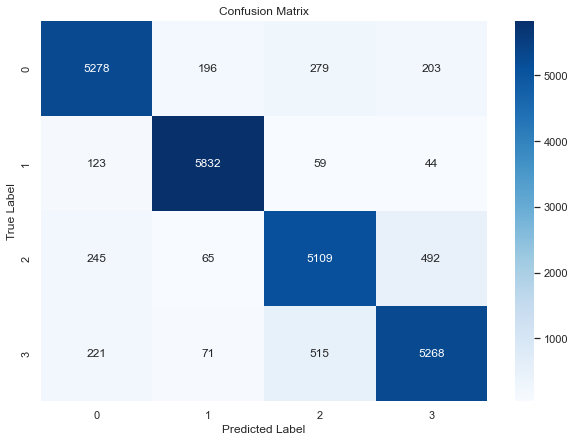

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {fscore}")


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [90]:
#from sklearn.feature_extraction.text import CountVectorizer
x_new = np.array(test_data.iloc[:,3].values)
y_new = np.array(test_data.label.values)
cv = CountVectorizer(max_features = 5000)
x_new = cv.fit_transform(test_data['text']).toarray()
print("X.shape = ",x_new.shape)
print("y.shape = ",y_new.shape)

X.shape =  (7600, 5000)
y.shape =  (7600,)


In [91]:
y_pred_test = model.predict(x_new)
y_pred_test

array([1, 1, 2, ..., 1, 3, 3])

In [92]:
test_data['predicted_labels'] = y_pred_test
test_data.tail(20)

,label,title,news_content,text,predicted_labels
7580,2,England labour but find their second wind,This was not an easy day on which to play cric...,england labour find second wind easy day play ...,4
7581,3,EBay #39;s Buy Of Rent.com May Lack Strategic ...,Standard amp; Poor #39;s Equity Research said...,ebay 39 buy rent com may lack strategic sense ...,1
7582,4,Analysis: PeopleSoft users speak out about Ora...,InfoWorld - The great debate over the impact o...,analysis peoplesoft user speak oracle takeover...,3
7583,2,Right-hander must pass physical,Right-hander Matt Clement and the Boston Red S...,right hander must pas physical right hander ma...,3
7584,2,"Pacers 89, Raptors 86",Jamaal Tinsley scored 17 of his 22 points in t...,pacer 89 raptor 86 jamaal tinsley scored 17 22...,1
7585,1,Pricey Drug Trials Turn Up Few New Blockbusters,The \$500 billion drug industry is stumbling b...,pricey drug trial turn new blockbuster 500 bil...,3
7586,2,NBA Game Summary - Denver at Miami,"Miami, FL (Sports Network) - Shaquille O #39;N...",nba game summary denver miami miami fl sport n...,4
7587,4,Hobbit-finding Boffins in science top 10,AP - Australian scientists who helped discover...,hobbit finding boffin science top 10 ap austra...,1
7588,4,"Search providers seek video, find challenges",Internet search providers are reacting to user...,search provider seek video find challenge inte...,2
7589,2,The Newest Hope ; Marriage of Necessity Just M...,"NEW YORK - The TV lights were on, the cameras ...",newest hope marriage necessity might work new ...,1


In [105]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_data['label'], test_data['predicted_labels'])
print(f"Accuracy: {accuracy}")


Accuracy: 0.25842105263157894


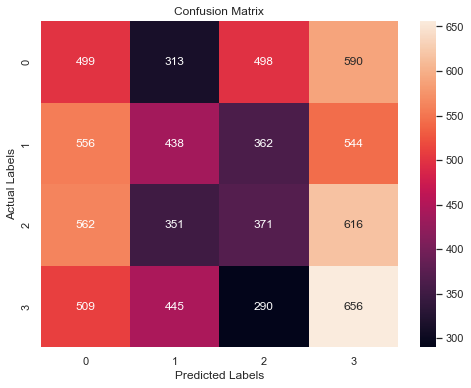

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(test_data['label'], test_data['predicted_labels'])
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [94]:
from sklearn.metrics import classification_report

print(classification_report(test_data['label'], test_data['predicted_labels']))


              precision    recall  f1-score   support

           1       0.23      0.26      0.25      1900
           2       0.28      0.23      0.25      1900
           3       0.24      0.20      0.22      1900
           4       0.27      0.35      0.30      1900

    accuracy                           0.26      7600
   macro avg       0.26      0.26      0.26      7600
weighted avg       0.26      0.26      0.26      7600



Model is perforing very good with training data while its performance is poor on new unseen data which indicated an  overfitting, 

# Part 2: Experiment Design for Dating App Badge


Design an experiment for the following hypothesis for a gender-asymmetric feature for a generic dating app:

- If we let male users display a badge on their profiles
    - Then they will get more matches with female users

### Variables you can manipulate:

- Whether a male user is given the option to add the badge
- Whether a female user is able to see the badge on male profiles

### How the app works:

- A user `views` other users’ profiles in various contexts, some one-at-a-time and some in a grid of profiles
    - For each profile, the user can `skip` or `send a like`
- If two users send a like to each other, they `match` and are able to `send messages` to each other

### Define the following:

- **Hypothesis:** 
 (H0): The option for male users to display a badge on their profiles will not affect their match rate with female users
 (H1): The option for male users to display a badge on their profiles will increases their match rate with female users


- **Cohorts**
 Control Group: Male users who are not given the option to add a badge to their profiles and female users who cannot see badges on male profiles
 Treatment Group: Male users who are given the option to add a badge to their profiles and female users who can see badges on male profiles

For enrolment: target by their activity level and randomization


- **Duration and Sample Size:** List how will you calculate duration and sample size.
 Sample size should be calculated with sample size calculator depending on expected effect. We will use historical data to estimate our basline conversion.
 Duration could be between 2-4 weeks, depeneding on sample size and expected effect.

- **Events**
 To collect the necessary data, we should track these events:

Profile view: log whenever a user views another user's profile, capturing whether the profile viewed belongs to the control or treatment group.
Send a like: track when a user sends a like, including the direction (male to female, female to male) and the group membership of both users.
Match event: record when two users match, including their group status.


- **Key Metrics**
 Primary metric:  match rate between male and female users, specifically looking at the increase in matches for males with badges compared to those without.
 Secondary metric: number of likes sent by female users to male users with badges versus without badges, and the number of messages exchanged after a match occurs could serve as secondary metrics to see the engagement.
 Safety metric: churn rate, negative feedback or reports related to badges, and any significant changes in app usage patterns among female users. These safety metrics will help identify if the badge feature causes any adverse effects on the user experience or app dynamics.
 
- **Reporting:** 
 Reporting plan:
    1.Executive summary
    2.Methodology
    3.Visuaizations and results
    4.Recommendations    

